In [45]:

# --- 1. Import Libraries ---
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# --- 2. Load Data ---
 
file_path = '../data/train.csv'
df = pd.read_csv(file_path)

In [47]:

# --- 3. Explore Data (Initial Check) ---
 
print("--- First 5 rows of the data ---")
print(df.head())

 
print("\n--- Data Info ---")
df.info()

# Null values  
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

--- First 5 rows of the data ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

In [48]:

# --- 4. Data Cleaning & Preprocessing ---
 
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(f"\nMissing 'Age' values filled with median: {age_median}")

# Step 4.2: Handle Missing 'Embarked' values
 
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Missing 'Embarked' values filled with mode: {embarked_mode}")

# Step 4.3: Drop 'Cabin' column
 
df.drop('Cabin', axis=1, inplace=True)
print("'Cabin' column dropped.")

# Step 4.4: Convert Categorical columns to Numbers
 
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
 
 
print("\n--- Data after cleaning and conversion ---")
print(df.head())
print("\n--- Checking for nulls again ---")
print(df.isnull().sum())


Missing 'Age' values filled with median: 28.0
Missing 'Embarked' values filled with mode: S
'Cabin' column dropped.

--- Data after cleaning and conversion ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     Fa

C:\Users\acer\AppData\Local\Temp\ipykernel_20700\3447271416.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_20700\3447271416.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [49]:
# --- 5. Feature Selection ---
 
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = df['Survived']

print("\n--- Features (X) ---")
print(X.head())
print("\n--- Target (y) ---")
print(y.head())



--- Features (X) ---
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

--- Target (y) ---
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [50]:
# --- 6. Split Data into Training and Testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")



Data split into: 712 training samples and 179 testing samples.


In [51]:
# --- 7. Train the Machine Learning Model ---
 
model = LogisticRegression(max_iter=1000) 

# Model  train  
model.fit(X_train, y_train)
print("\nModel training complete!")




Model training complete!



--- Model Evaluation ---
Accuracy: 81.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:


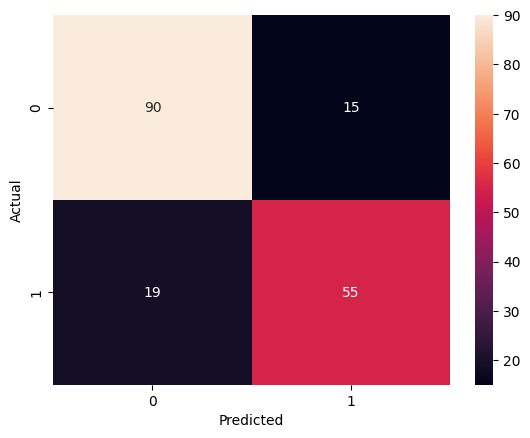

In [52]:

# --- 8. Evaluate the Model ---
# Test data predictions  
y_pred = model.predict(X_test)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
import joblib

 
import os
os.makedirs('../models', exist_ok=True)  

model_filename = '../models/titanic_logistic_regression.joblib'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to ../models/titanic_logistic_regression.joblib
